In [10]:
Simulating Quantum Phase Estimation using Inverse Fourier Transform

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import IBMQ,execute,Aer
from math import pi
import matplotlib

In [3]:
def cRotation(qc, q, i, j, angle):
    
    a = angle / 2
    
    qc.u1(a, q[i])
    qc.cx(q[j], q[i])
    qc.u1(-a, q[i])
    qc.cx(q[j], q[i])
    qc.u1(a, q[j])
    
def swap(qc, q, i, j):
    
    qc.cx(q[i], q[j])
    qc.cx(q[j], q[i])
    qc.cx(q[i], q[j])
    
def inverse_qft(qc, q, indices):
        
    reverse = list(reversed(indices))
    
    
    #swaps need to happen
    n = len(reverse)
    
    for i in  range(int(n/ 2)):
        j = n - i - 1
        swap(qc, q, i, j)
    
    for n, i in enumerate(rev):
        
        angle = -pi/2**n
        
        for j in rev[:n]:
            
            cRotation(qc, q, i, j, angle)
            angle *= 2
    
        qc.h(q[i])
    

qr = QuantumRegister(16)

cr = ClassicalRegister(16)

qc = QuantumCircuit(qr, cr)

#add hadamard gate for superposition
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

#cnot for qubit 0 to switch to 1
qc.x(qr[4])

cRotation(qc, qr, 3, 4, pi/8)    #rotate by 2*x/2^t for next qubit

cRotation(qc, qr, 2, 4, pi/4)

cRotation(qc, qr, 1, 4, pi/2)

cRotation(qc, qr, 0, 4, pi)

inverse_qft(qc, qr, range(4))

#extract output
qc.measure(qr, cr)

In [13]:
backend1=Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend1).result()

print("simulation: ",job)
print(job.get_counts(qc))

simulation:  Result(backend_name='qasm_simulator', backend_version='0.5.2', date=datetime.datetime(2020, 8, 15, 2, 52, 56, 634563), header=Obj(backend_name='qasm_simulator', backend_version='0.5.2'), job_id='23d4f45c-635d-4328-a27d-fd5409b7564c', metadata={'max_memory_mb': 8130, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0062098}, qobj_id='b532d23c-06ed-40cd-808b-44090b3853df', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x18=1024)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3], ['c0', 4]], creg_sizes=[['c0', 5]], memory_slots=5, n_qubits=5, name='circuit8', qreg_sizes=[['q0', 5]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3], ['q0', 4]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3593815653, shots=1024, status='DONE', success=True, time_taken=0.0055919)], status='COMPLETED', success=True, ti

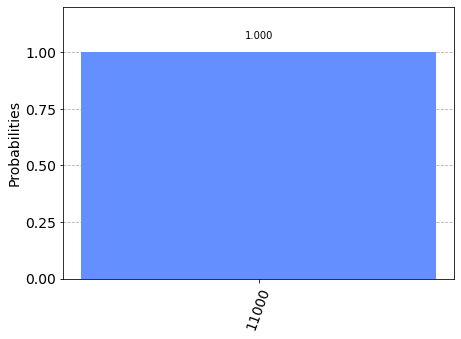

In [15]:
plot_histogram(job.get_counts(qc))

In [ ]:
print(qc.qasm())

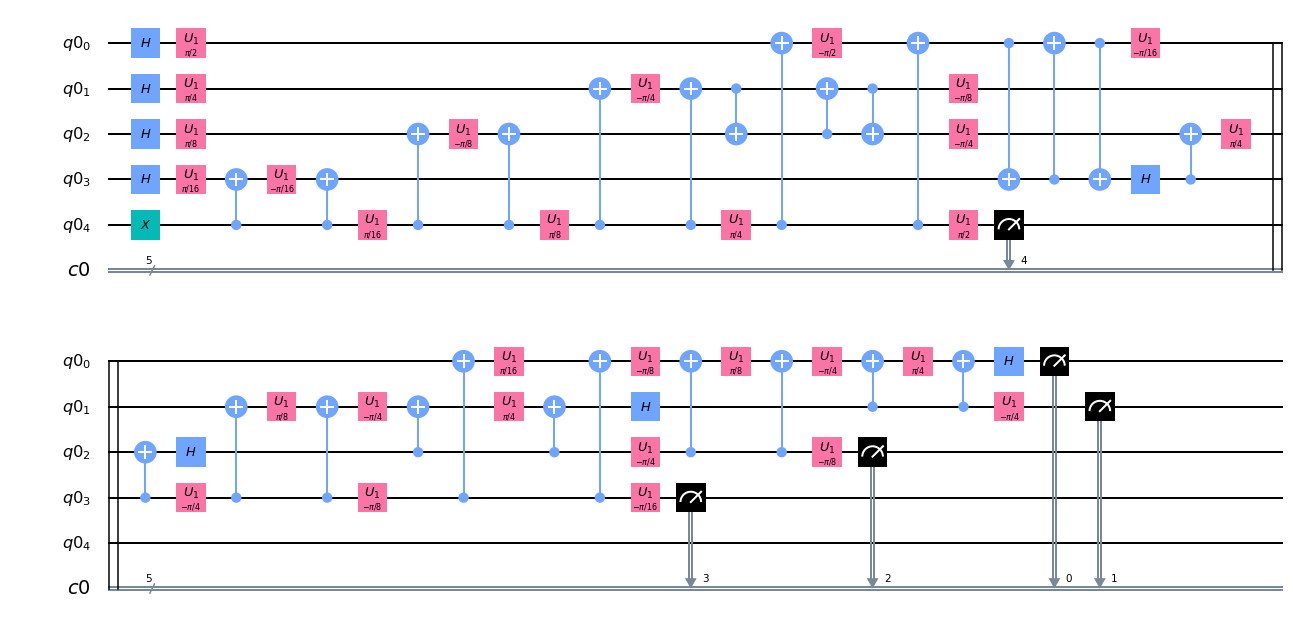

In [16]:
qc.draw(output='mpl')

In [ ]:
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_melbourne')

# Run with 2048 shots
shots = 2048
job1 = execute(qc, backend=backend, shots=2048, optimization_level=3)
job_monitor(job1)

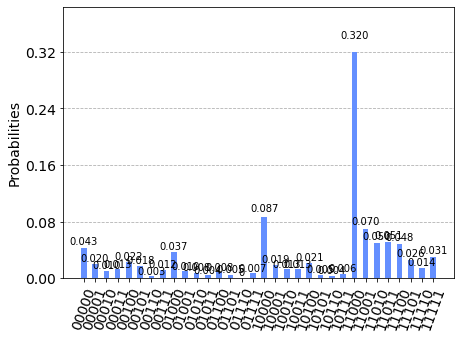

In [19]:
results = job1.result()
answer = results.get_counts(qc)

plot_histogram(answer)